In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime

In [5]:
from pandas import Series

In [6]:
import warnings

In [9]:
train = pd.read_csv("Train_SU63ISt.csv")

In [11]:
test = pd.read_csv("Test_0qrQsBZ.csv")
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [12]:
train_ori = train.copy()

In [13]:
test_ori = test.copy()

In [14]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [15]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [16]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [17]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [18]:
train.shape

(18288, 3)

In [19]:
test.shape

(5112, 2)

In [20]:
train['Datetime'] = pd.to_datetime(train.Datetime , format='%d-%m-%Y %H:%M')

In [21]:
test['Datetime'] = pd.to_datetime(test.Datetime , format='%d-%m-%Y %H:%M')

In [22]:
train_ori['Datetime'] = pd.to_datetime(train_ori.Datetime , format='%d-%m-%Y %H:%M')

In [23]:
test_ori['Datetime'] = pd.to_datetime(test_ori.Datetime , format='%d-%m-%Y %H:%M')

In [24]:
for i in (train , test , train_ori , test_ori):
    i['year'] = i.Datetime.dt.year

In [25]:
for i in (train , test , train_ori , test_ori):
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [26]:
train['day of week'] = train['Datetime'].dt.dayofweek

In [27]:
temp = train['Datetime']

In [28]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1

    else:
        return 0

In [29]:
temp2 = train['Datetime'].apply(applyer)

In [30]:
train['weekend'] = temp2

In [31]:
train.index = train['Datetime']

In [32]:
df = train.drop('ID',1)

In [33]:
ts = df['Count']

In [36]:
plt.figure(figsize=(12,7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

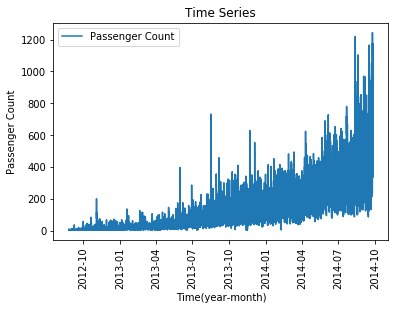

In [38]:
plt.plot(ts , label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.xticks(rotation=90)
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

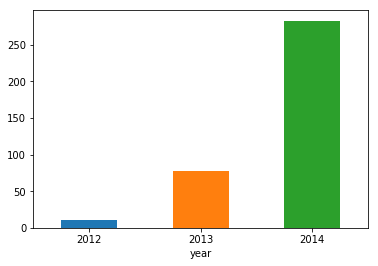

In [40]:
train.groupby('year')['Count'].mean().plot.bar()
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

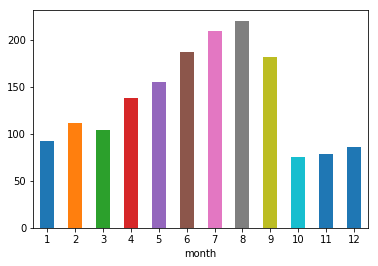

In [42]:
train.groupby('month')['Count'].mean().plot.bar()
plt.xticks(rotation=0)

In [43]:
temp3 = train.groupby(['year' , 'month'])['Count'].mean()

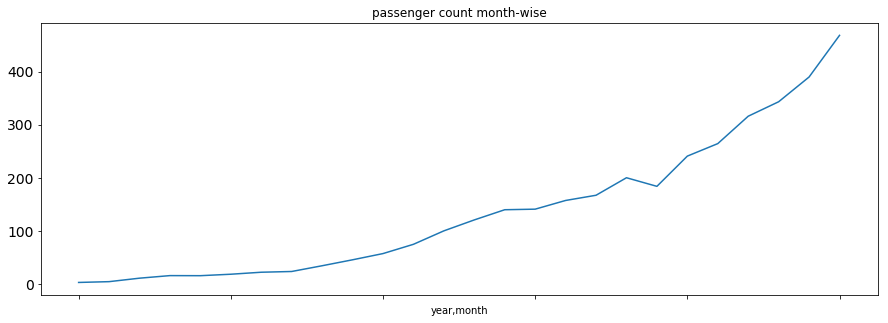

In [44]:
temp3.plot(figsize=(15,5) , title = 'passenger count month-wise', fontsize=14)

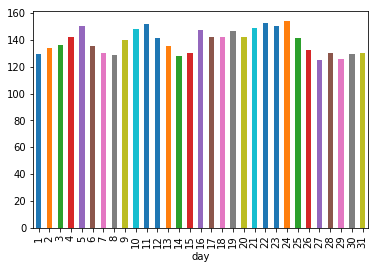

In [37]:
train.groupby('day')['Count'].mean().plot.bar()

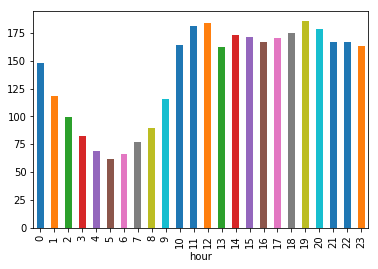

In [38]:
train.groupby('hour')['Count'].mean().plot.bar()

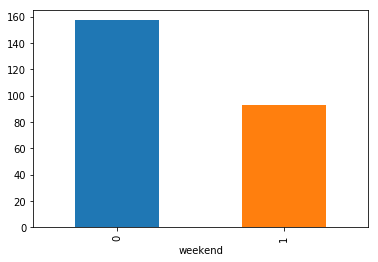

In [39]:
train.groupby('weekend')['Count'].mean().plot.bar()

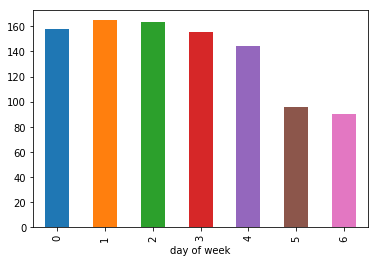

In [40]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [41]:
train = train.drop('ID',1)

In [42]:
train.Timestamp = pd.to_datetime(train.Datetime , format='%d-%m-%Y %H:%M')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [43]:
train.index = train.Timestamp

In [44]:
hourly = train.resample('H').mean()

In [45]:
daily = train.resample('D').mean()

In [46]:
monthly = train.resample('M').mean()

In [47]:
weekly = train.resample('W').mean()

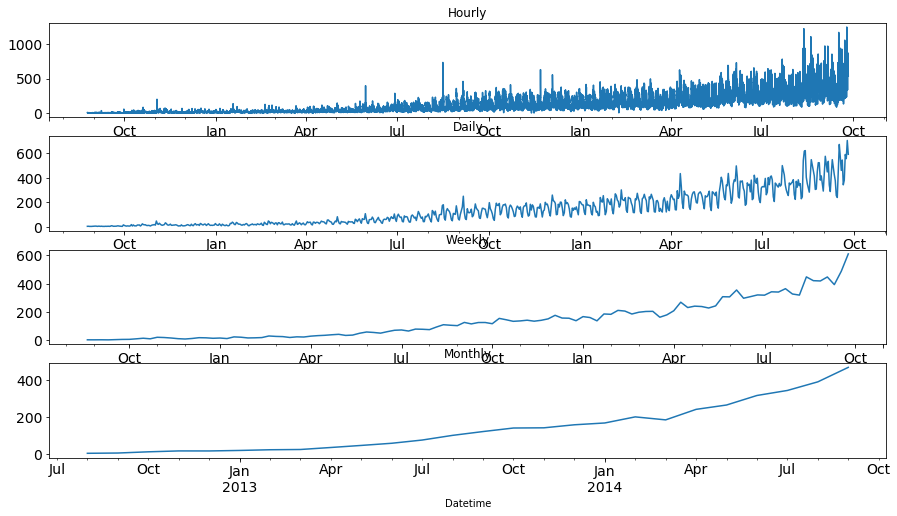

In [48]:
fig,axes = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8) , title='Hourly' , fontsize=14 , ax = axes[0])
daily.Count.plot(figsize=(15,8) , title='Daily' , fontsize=14 , ax = axes[1])
weekly.Count.plot(figsize=(15,8) , title='Weekly' , fontsize=14 , ax = axes[2])
monthly.Count.plot(figsize=(15,8) , title='Monthly' , fontsize=14 , ax = axes[3])

plt.show()

In [49]:
test.Timestamp = pd.to_datetime(test.Datetime , format='%d-%m-%Y %H:%M')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [50]:
test.index = test.Timestamp

In [51]:
test = test.resample('D').mean()

In [52]:
train.Timestamp = pd.to_datetime(train.Datetime , format='%d-%m-%Y %H:%M')

In [53]:
train.index = train.Timestamp

In [54]:
train = train.resample('D').mean()

In [55]:
Train = train.ix['2012-08-25':'2014-06-24']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [56]:
valid = train.ix['2014-06-25' : '2014-09-25']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


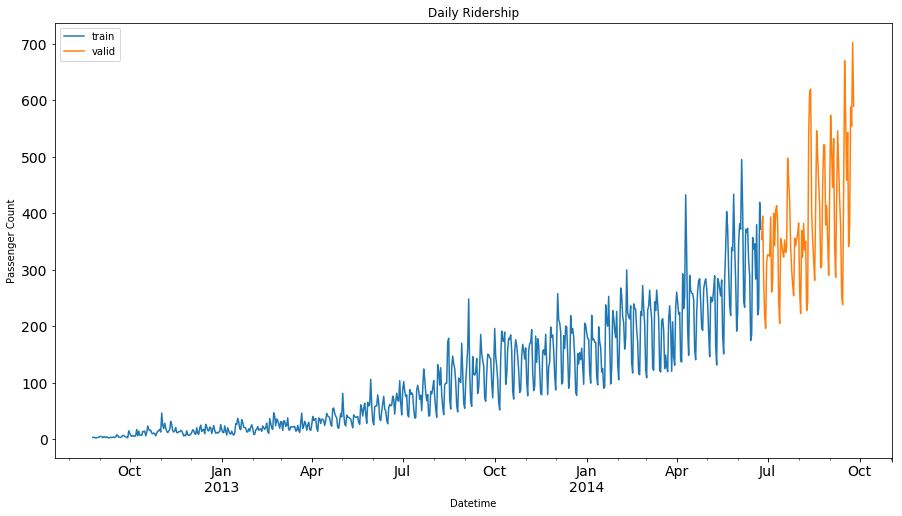

In [57]:
Train.Count.plot(figsize=(15,8) , title='Daily Ridership' , fontsize=14 , label='train')
valid.Count.plot(figsize=(15,8) , title='Daily Ridership' , fontsize=14 , label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')
plt.show()

In [58]:
dd = np.asarray(Train.Count)

In [59]:
y_hat = valid.copy()

In [60]:
y_hat['naive'] = dd[len(Train) - 1]

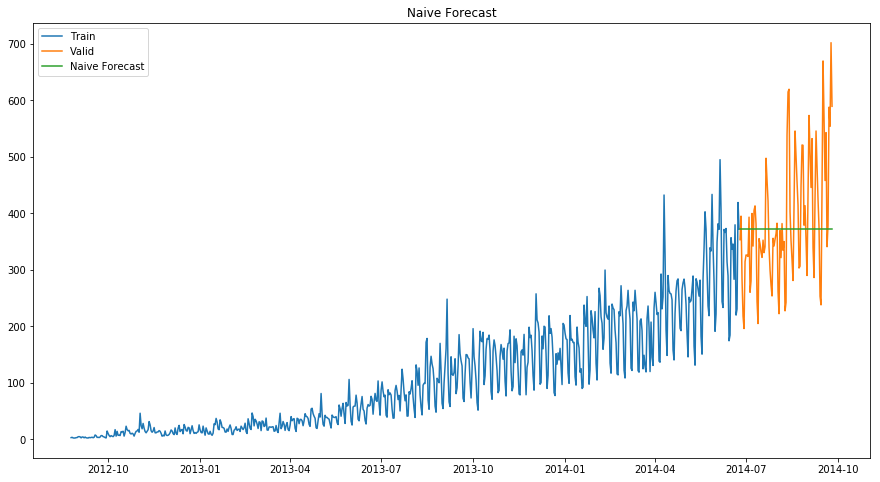

In [61]:
plt.figure(figsize=(15,8))
plt.plot(Train.index , Train['Count'] , label = 'Train')
plt.plot(valid.index , valid['Count'] , label = 'Valid')
plt.plot(valid.index , y_hat['naive'] , label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
rms = sqrt(mean_squared_error(valid.Count , y_hat['naive']))

In [64]:
print(rms)

111.79050467496724


In [65]:
y_hat_avg = valid.copy()

In [66]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

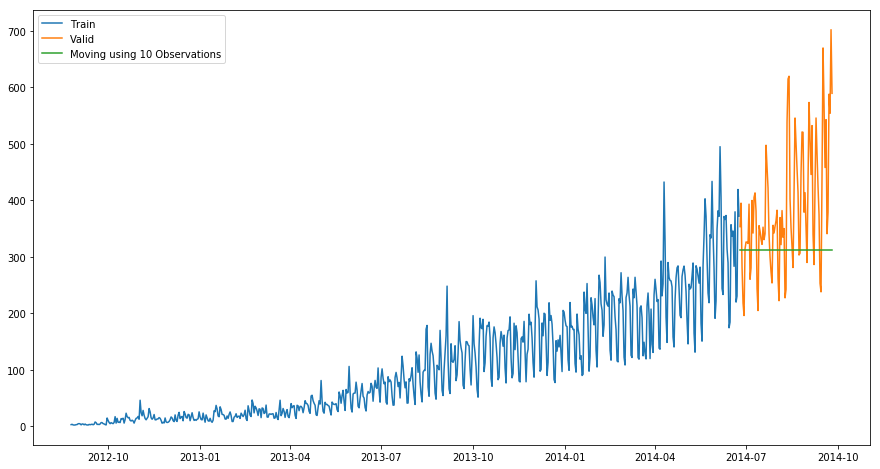

In [67]:
plt.figure(figsize=(15,8))
plt.plot(Train.index , Train['Count'] , label = 'Train')
plt.plot(valid.index , valid['Count'] , label = 'Valid')
plt.plot(valid.index , y_hat_avg['moving_avg_forecast'] , label = 'Moving using 10 Observations')
plt.legend(loc = 'best')
#plt.title('Naive Forecast')
plt.show()

In [68]:
rms = sqrt(mean_squared_error(valid['Count'] , y_hat_avg['moving_avg_forecast']))

In [69]:
print(rms)

134.23733308950264


In [70]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]

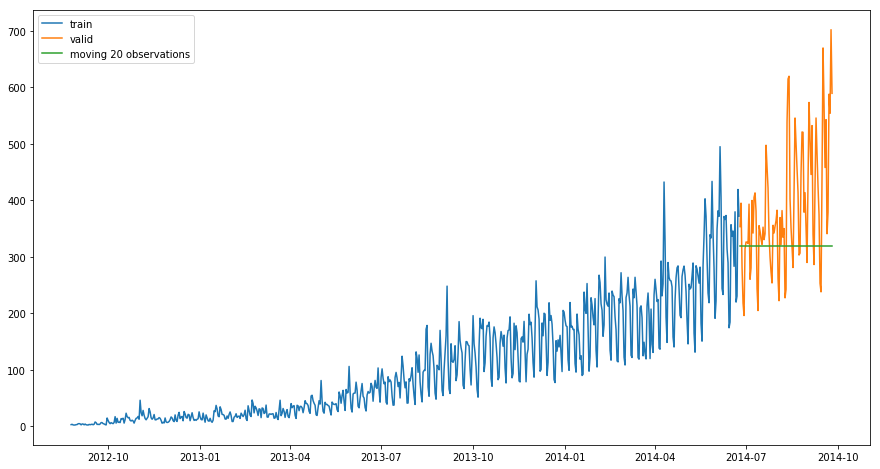

In [71]:
plt.figure(figsize=(15,8))
plt.plot(Train.index , Train['Count'] , label='train')
plt.plot(valid.index , valid['Count'] , label= 'valid')
plt.plot(valid.index , y_hat_avg['moving_avg_forecast'] , label = 'moving 20 observations')
plt.legend(loc = 'best')
#plt.title('')
plt.show()

In [72]:
rms = sqrt(mean_squared_error(valid['Count'] , y_hat_avg['moving_avg_forecast']))

In [73]:
print(rms)

130.44984977550422


In [74]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

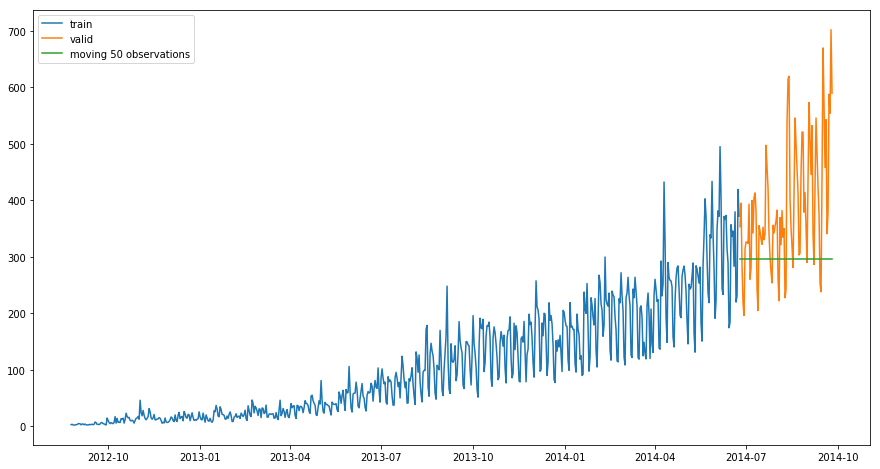

In [75]:
plt.figure(figsize=(15,8))
plt.plot(Train.index , Train['Count'] , label='train')
plt.plot(valid.index , valid['Count'] , label= 'valid')
plt.plot(valid.index , y_hat_avg['moving_avg_forecast'] , label = 'moving 50 observations')
plt.legend(loc = 'best')
#plt.title('')
plt.show()

In [76]:
rms = sqrt(mean_squared_error(valid['Count'] , y_hat_avg['moving_avg_forecast']))

In [77]:
print(rms)

144.19175679986802


In [78]:
#exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing , Holt

In [79]:
y_hat_avg = valid.copy()

In [80]:
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6 , optimized = False)

In [81]:
fit2

In [82]:
y_hat_avg['SES'] = fit2.forecast(len(valid))

In [83]:
y_hat_avg['SES']

Datetime
2014-06-25    363.522492
2014-06-26    363.522492
2014-06-27    363.522492
2014-06-28    363.522492
2014-06-29    363.522492
2014-06-30    363.522492
2014-07-01    363.522492
2014-07-02    363.522492
2014-07-03    363.522492
2014-07-04    363.522492
2014-07-05    363.522492
2014-07-06    363.522492
2014-07-07    363.522492
2014-07-08    363.522492
2014-07-09    363.522492
2014-07-10    363.522492
2014-07-11    363.522492
2014-07-12    363.522492
2014-07-13    363.522492
2014-07-14    363.522492
2014-07-15    363.522492
2014-07-16    363.522492
2014-07-17    363.522492
2014-07-18    363.522492
2014-07-19    363.522492
2014-07-20    363.522492
2014-07-21    363.522492
2014-07-22    363.522492
2014-07-23    363.522492
2014-07-24    363.522492
                 ...    
2014-08-27    363.522492
2014-08-28    363.522492
2014-08-29    363.522492
2014-08-30    363.522492
2014-08-31    363.522492
2014-09-01    363.522492
2014-09-02    363.522492
2014-09-03    363.522492
2014-09-04    36

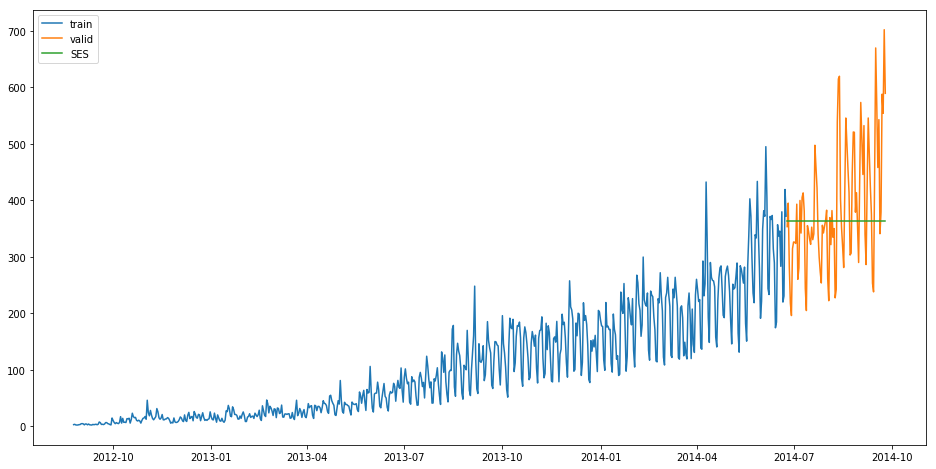

In [84]:
plt.figure(figsize=(16,8))
plt.plot(Train.index , Train['Count'] , label='train')
plt.plot(valid.index , valid['Count'] , label='valid')
plt.plot(valid.index , y_hat_avg['SES'] , label='SES')
plt.legend(loc = 'best')
plt.show()

In [85]:
rms = sqrt(mean_squared_error(valid['Count'] , y_hat_avg['SES']))

In [86]:
print(rms)

113.43708111884514


In [87]:
#Holts Linear Trend Model

import statsmodels.api as sm

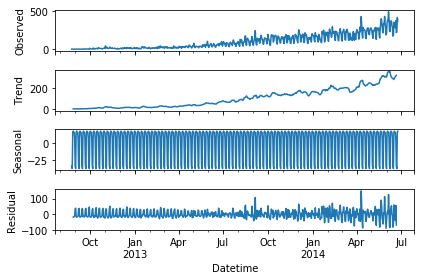

In [88]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)
plt.show()

In [89]:
y_hat_avg = valid.copy()

In [90]:
fit1 = Holt(np.asarray(Train.Count)).fit(smoothing_level = 0.3 , smoothing_slope=0.1)

In [91]:
y_hat_avg['holt_linear'] = fit1.forecast(len(valid))

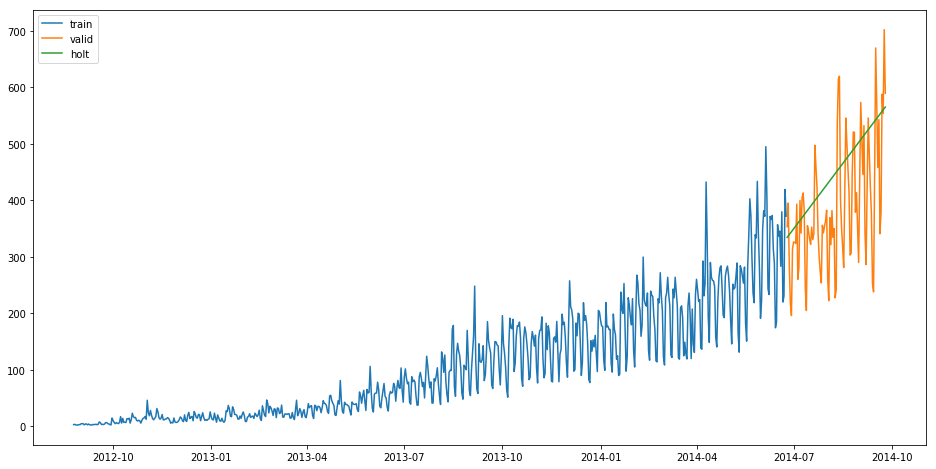

In [92]:
plt.figure(figsize=(16,8))
plt.plot(Train.Count , label='train')
plt.plot(valid.Count , label='valid')
plt.plot(y_hat_avg['holt_linear'] , label='holt')
plt.legend(loc = 'best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(valid.Count , y_hat_avg.holt_linear))

In [94]:
print(rms)

112.94278345314041


In [95]:
submission = pd.read_csv("Time Series/submission.csv")

In [96]:
predict = fit1.forecast(len(test))

In [97]:
test['prediction'] = predict

In [98]:
train_ori['ratio'] = train_ori.Count/train_ori.Count.sum()

In [99]:
temp = train_ori.groupby('hour')['ratio'].sum()

In [100]:
temp

hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: ratio, dtype: float64

In [101]:
pd.DataFrame(temp , columns=[ 'ratio']).to_csv('Groupby.csv')

In [102]:
temp2 = pd.read_csv('Groupby.csv')
temp2

,hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [103]:
merge = pd.merge(test, test_ori , on=('day' , 'month' , 'year') , how='left')

In [104]:
merge['hour'] = merge['hour_y']

In [105]:
merge = merge.drop(['year' , 'month' , 'hour_x' , 'hour_y'] , axis=1)

In [106]:
merge = merge.drop(['Datetime'],axis=1)

In [107]:
prediction = pd.merge(merge , temp2 , on='hour' , how='left')

In [108]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [109]:
prediction['ID'] = prediction['ID_y']

In [110]:
submission = prediction.drop(['ID_x' , 'day' , 'prediction' , 'ID_y' , 'hour' , 'ratio'] , axis=1)

In [111]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [112]:
#holt winter's model on daily time series

In [113]:
y_hat_avg = valid.copy()

In [114]:
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) , seasonal_periods=7 , trend='add' , seasonal='add').fit()

In [115]:
y_hat_avg['Holt Winter'] = fit1.forecast(len(valid))

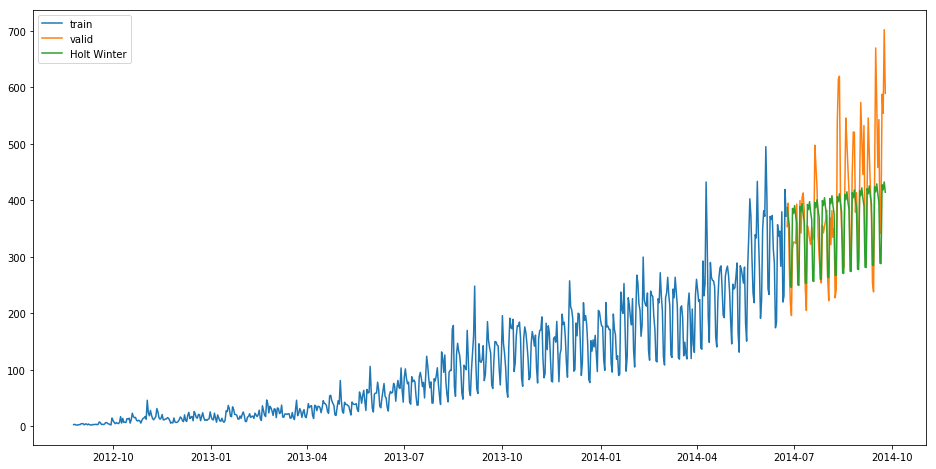

In [116]:
plt.figure(figsize=(16,8))
plt.plot(Train.Count , label='train')
plt.plot(valid.Count , label='valid')
plt.plot(y_hat_avg['Holt Winter'] , label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [117]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg['Holt Winter']))

In [118]:
print(rms)

82.37467736825413


In [119]:
predict = fit1.forecast(len(test))

In [120]:
test['prediction'] = predict

In [125]:
merge = pd.merge(test , test_ori , on=('day' , 'month' , 'year') , how='left')

In [128]:
merge['hour'] = merge['hour_y']

In [130]:
merge = merge.drop(['year' , 'month' , 'Datetime' , 'hour_x' , 'hour_y'] , axis=1)

In [134]:
prediction = pd.merge(merge , temp2 , on='hour' , how='left')

In [136]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [137]:
prediction['ID'] = prediction['ID_y']

In [141]:
submission = prediction.drop(['ID_x' , 'ID_y' , 'day' , 'ratio' ,'prediction' ,'hour'],axis=1)

In [143]:
pd.DataFrame(submission , columns=['ID' , 'Count']).to_csv('Holt winters.csv')

In [144]:
#arima model for both seasonality and trends

In [145]:
#Auto Regression Integrated Moving Average(ARIMA)

In [146]:
from statsmodels.tsa.stattools import adfuller

In [155]:
def test_stationaries(time_series):
    rol_mean = time_series.rolling(24).mean()
    rol_std = time_series.rolling(24).std()
    
    plt.figure(figsize = (20,10))
    plt.plot(time_series , color='blue' , label='original')
    plt.plot(rol_mean , color='red' , label = 'rolling_mean')
    plt.plot(rol_std , color='black' , label='rolling_std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean And Standard Deviation')
    
    print('Results of Dicky Fuller Test :')
    dftest = adfuller(time_series , autolag='AIC')
    print(dftest)
    dfoutput = pd.Series(dftest[0:4] , index=['Test-Statistics' , 'p-value' , '#Lags used' , 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
    
    

Results of Dicky Fuller Test :
(-4.456560536856827, 0.00023540466467665005, 45, 18242, {'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}, 181026.8337109476)
Test-Statistics                   -4.456561
p-value                            0.000235
#Lags used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


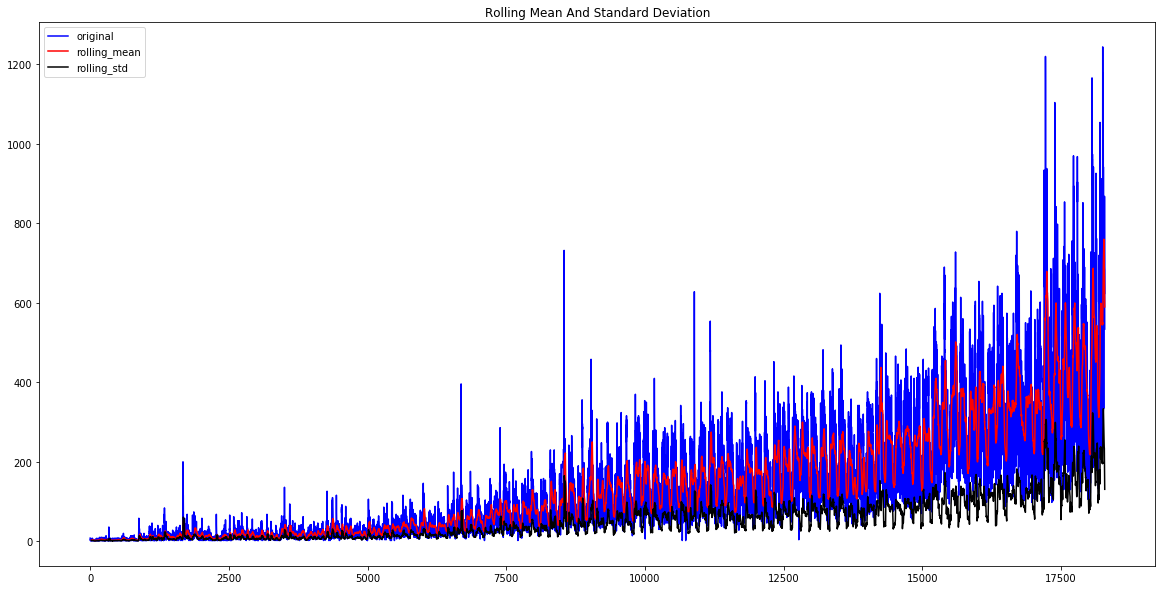

In [156]:
test_stationaries(train_ori.Count)

In [157]:
#it has test_statistics < critical value
#it can be stationary
#for trend to become stationary

Train_log = np.log(Train.Count)
valid_log = np.log(valid.Count)

In [158]:
moving_Avg = Train_log.rolling(24).mean()

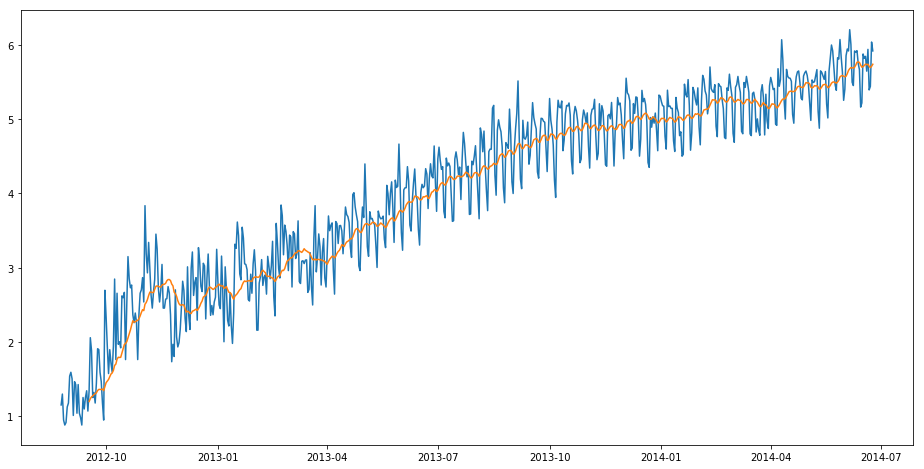

In [160]:
plt.figure(figsize=(16,8))
plt.plot(Train_log)
plt.plot(moving_Avg )
plt.show()

In [161]:
train_log_moving_avg_dif = Train_log - moving_Avg

In [163]:
train_log_moving_avg_dif.dropna(inplace=True)

Results of Dicky Fuller Test :
(-5.861645522775957, 3.399422269386272e-07, 20, 625, {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104}, 16.2381378419052)
Test-Statistics               -5.861646e+00
p-value                        3.399422e-07
#Lags used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


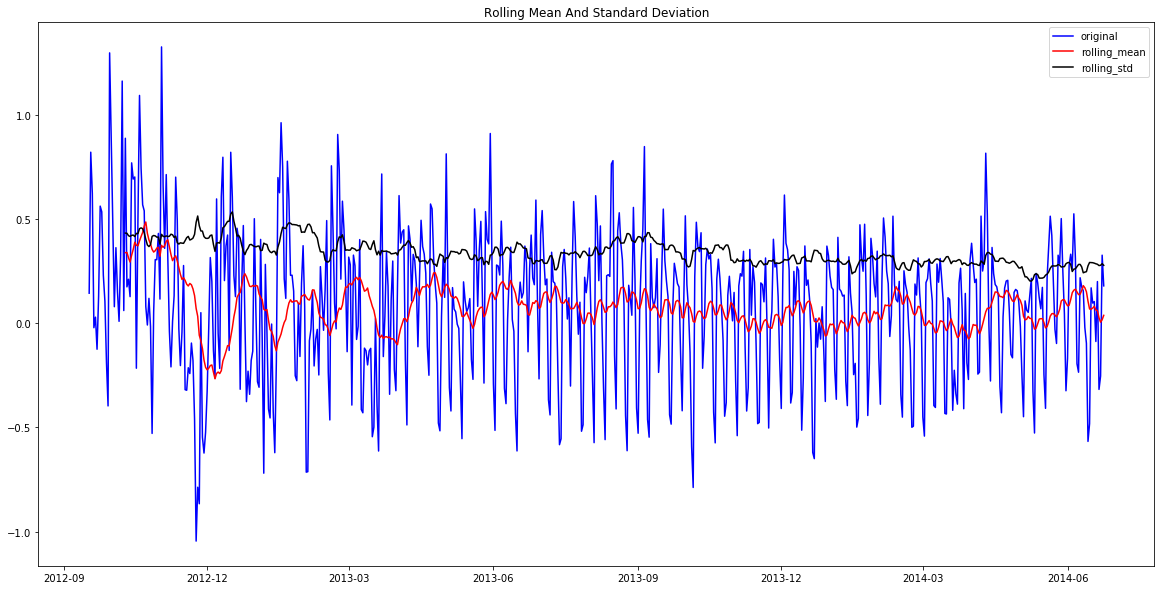

In [165]:
test_stationaries(train_log_moving_avg_dif)

In [166]:
#here test_statistics < critical value
#therefore now trend has become staionary or say it is remved.

#for mean to become stationary

In [171]:
train_log_dif = Train_log - Train_log.shift(1)
train_log_dif.dropna(inplace=True)

Results of Dicky Fuller Test :
(-8.237567849678868, 5.834049398271756e-13, 19, 648, {'1%': -3.4404817800778034, '5%': -2.866010569916275, '10%': -2.569150763698369}, 115.79917596602081)
Test-Statistics               -8.237568e+00
p-value                        5.834049e-13
#Lags used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


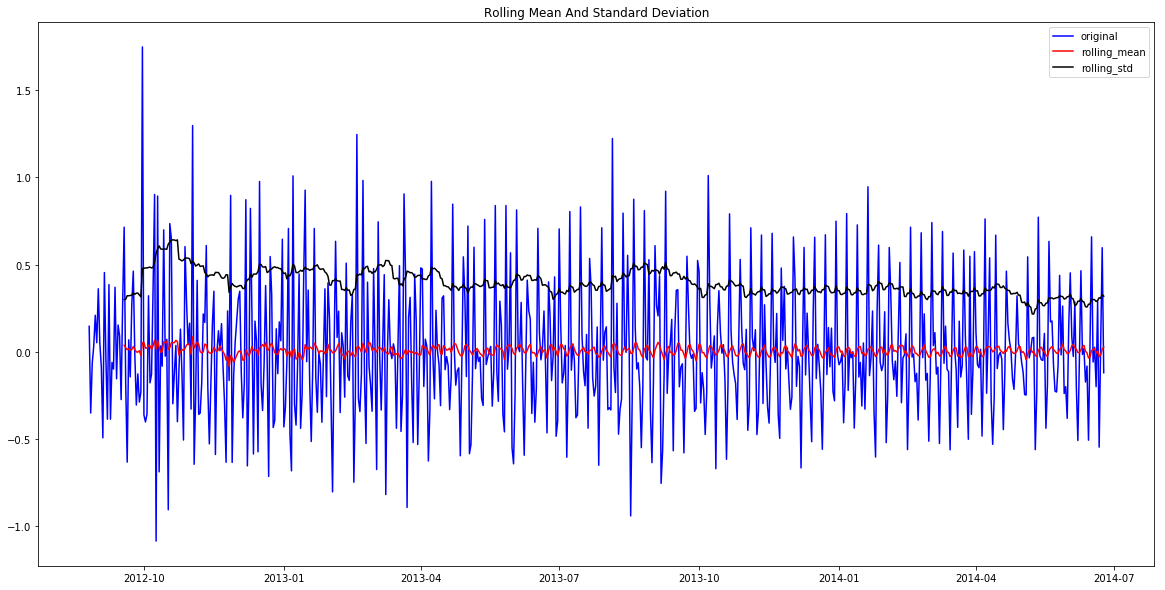

In [172]:
test_stationaries(train_log_dif)


In [173]:
#removing seasonality
#seasonality means periodic fluctuations

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [181]:
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values , freq=24)

In [182]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

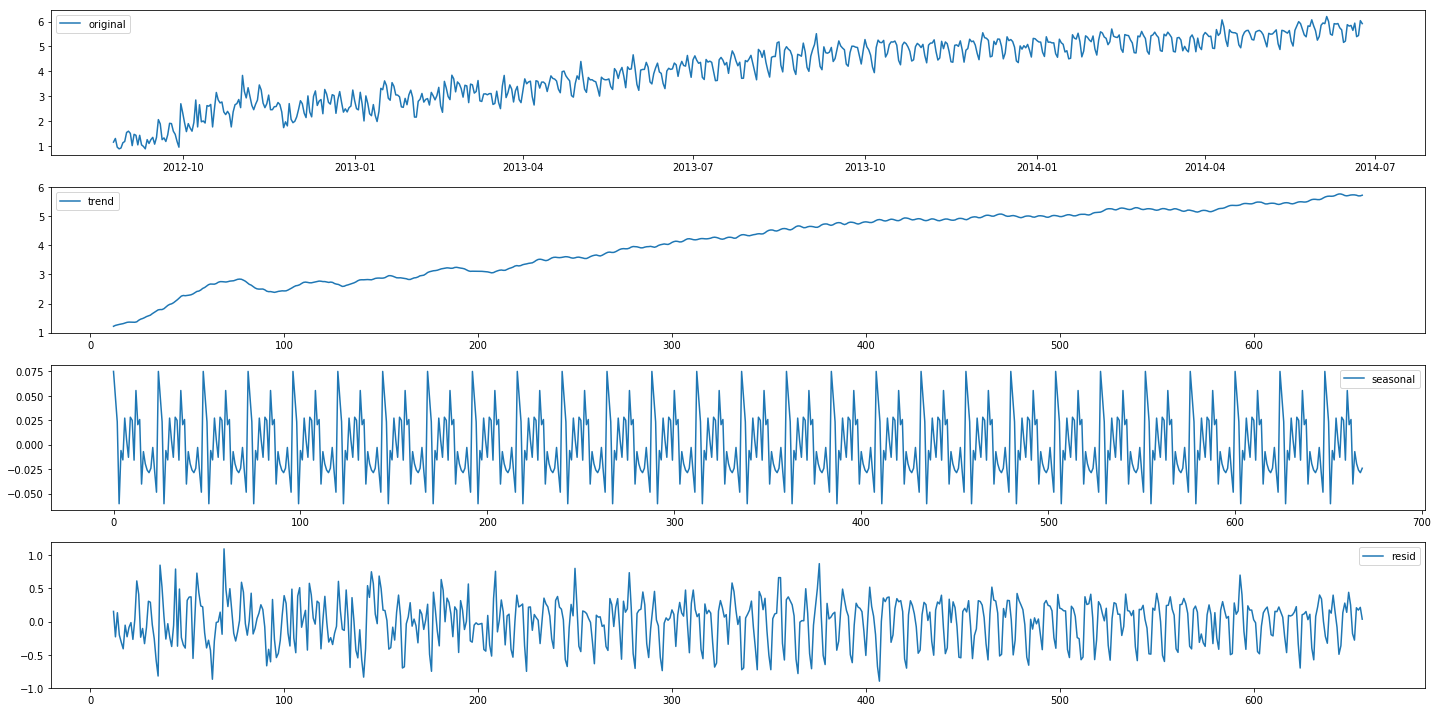

In [186]:
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(Train_log , label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend , label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal , label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual , label='resid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [187]:
#seasonality is constant
#lets check stationarity of residual

In [190]:
train_log_decompose = pd.DataFrame(residual)

In [191]:
train_log_decompose['date'] = Train_log.index

In [193]:
train_log_decompose.set_index('date' , inplace=True)

In [195]:
train_log_decompose.dropna(inplace=True)

Results of Dicky Fuller Test :
(-7.822096039408354, 6.628320880210831e-12, 20, 624, {'1%': -3.440873084361836, '5%': -2.866182929627575, '10%': -2.5692425987220577}, -31.688840304840596)
Test-Statistics               -7.822096e+00
p-value                        6.628321e-12
#Lags used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


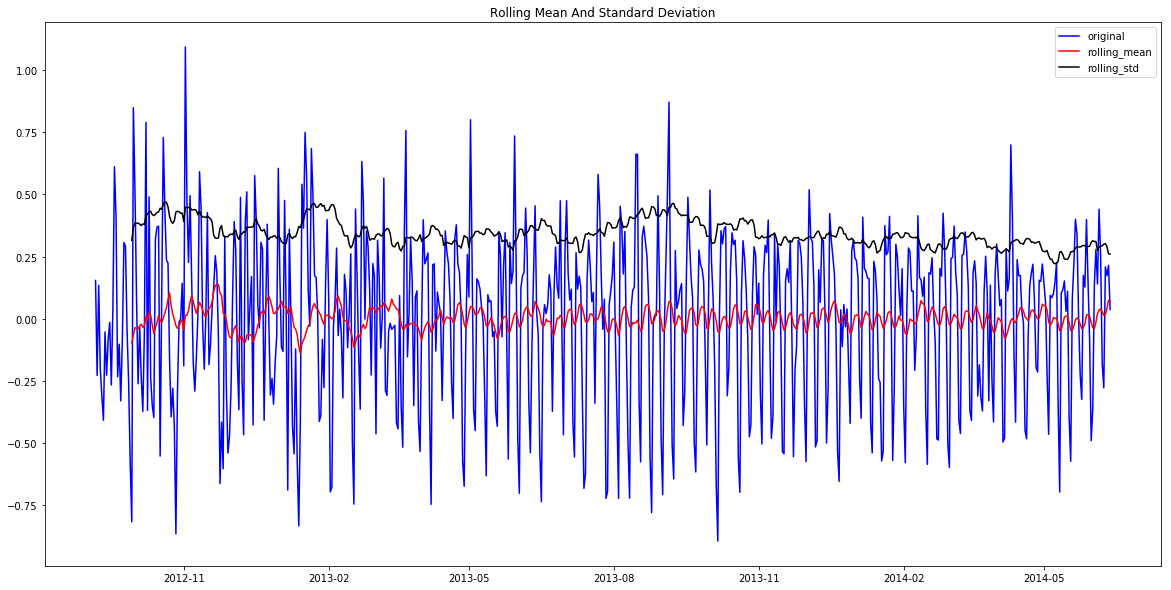

In [198]:
test_stationaries(train_log_decompose[0])

In [199]:
#residuals are stationary

In [200]:
#Forecasting using ARIMA Models

In [201]:
from statsmodels.tsa.stattools import acf , pacf

In [218]:
lag_acf = acf(train_log_dif.dropna() , nlags=25)

In [219]:
lag_pacf = pacf(train_log_dif.dropna() , nlags=25 , method='ols')

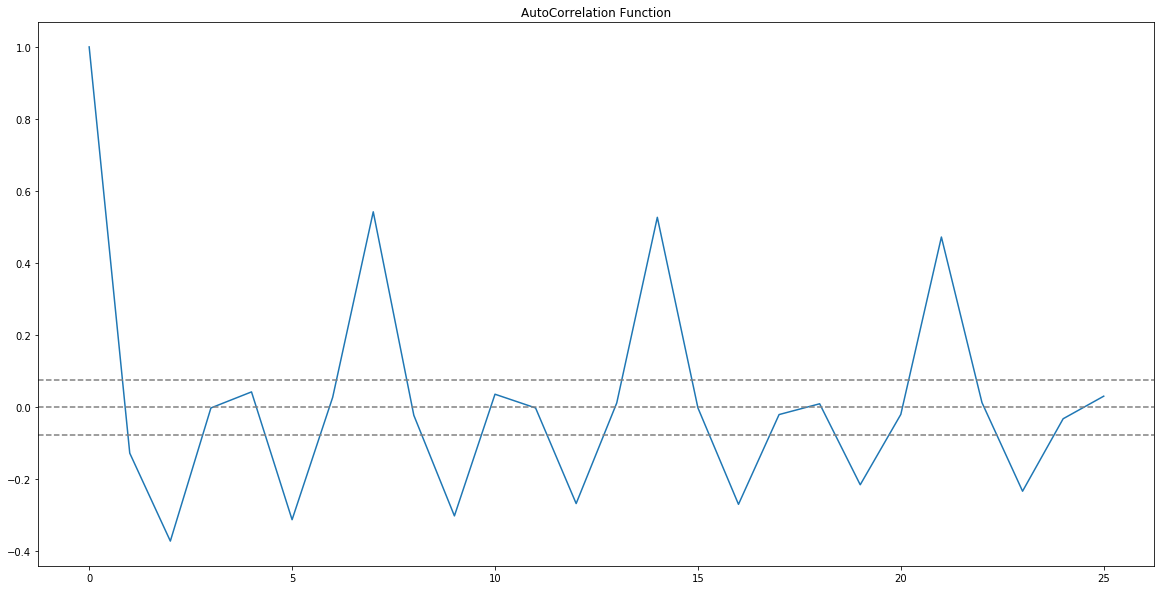

In [220]:
plt.figure(figsize=(20,10))
plt.plot(lag_acf)
plt.axhline(y=0 , linestyle='--' , color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_dif.dropna())) , linestyle='--' , color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_dif.dropna())) , linestyle='--' , color='gray')
plt.title('AutoCorrelation Function')
plt.show()

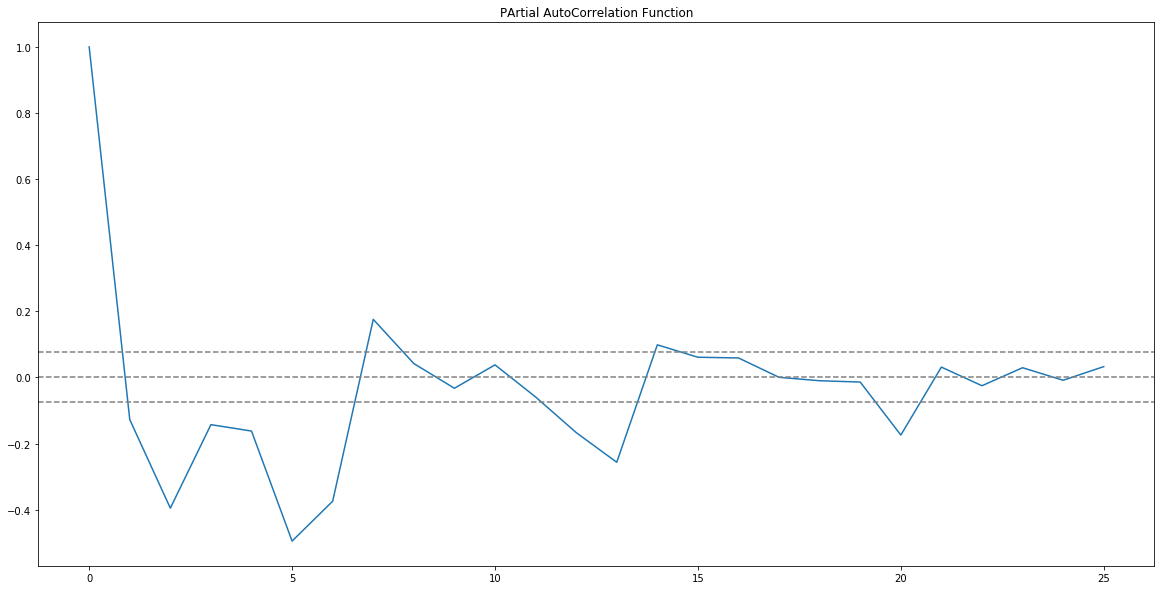

In [221]:
plt.figure(figsize=(20,10))
plt.plot(lag_pacf)
plt.axhline(y=0 , linestyle='--' , color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_dif.dropna())) , linestyle='--' , color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_dif.dropna())) , linestyle='--' , color='gray')
plt.title('PArtial AutoCorrelation Function')
plt.show()

In [222]:
#from above two 
#p = 1 , q=1

In [223]:
#we will make AR and MA model separately then we will mix them

In [224]:
#for AR model
#autoregressive model specifies that the output variable depends linearly on its own previous values.

In [225]:
from statsmodels.tsa.arima_model import ARIMA

In [226]:
model = ARIMA(Train_log , order=(2,1,0))

In [227]:
results_AR = model.fit(disp=-1)

In [228]:
model

In [229]:
results_AR

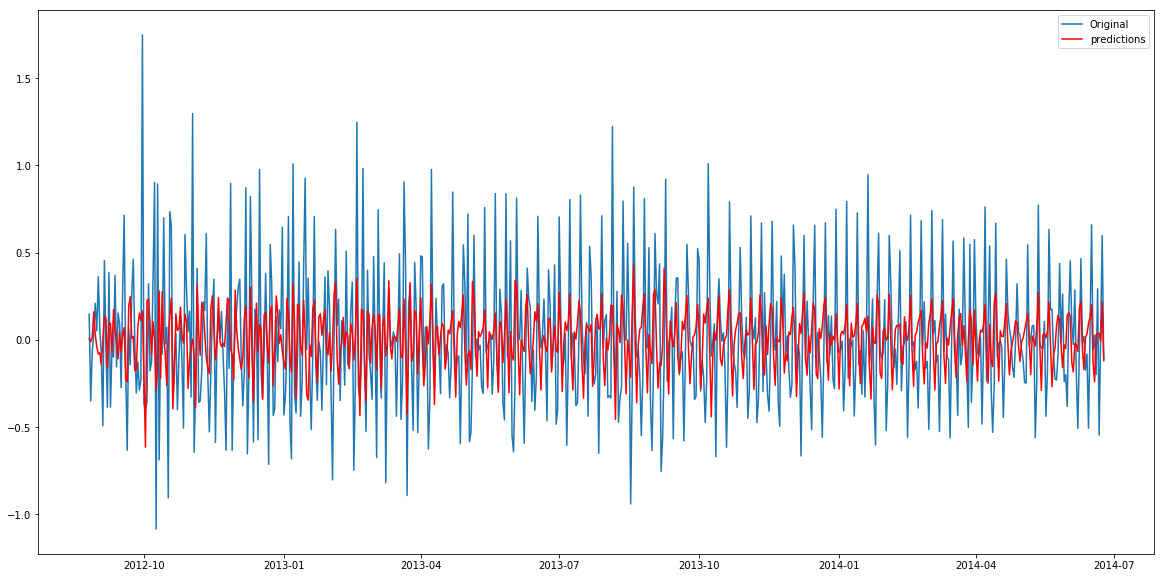

In [231]:
plt.figure(figsize=(20,10))
plt.plot(train_log_dif.dropna() , label='Original')
plt.plot(results_AR.fittedvalues , color='red' , label='predictions')
plt.legend(loc='best')
plt.show()

In [246]:
AR_predict = results_AR.predict(start='2014-06-25' , end='2014-09-25')

In [247]:
AR_predict = AR_predict.cumsum().shift().fillna(0)

In [248]:
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0] , index = valid.index)

In [249]:
AR_predict1 = AR_predict1.add(AR_predict , fill_value=0)

In [250]:
AR_predict = np.exp(AR_predict1)

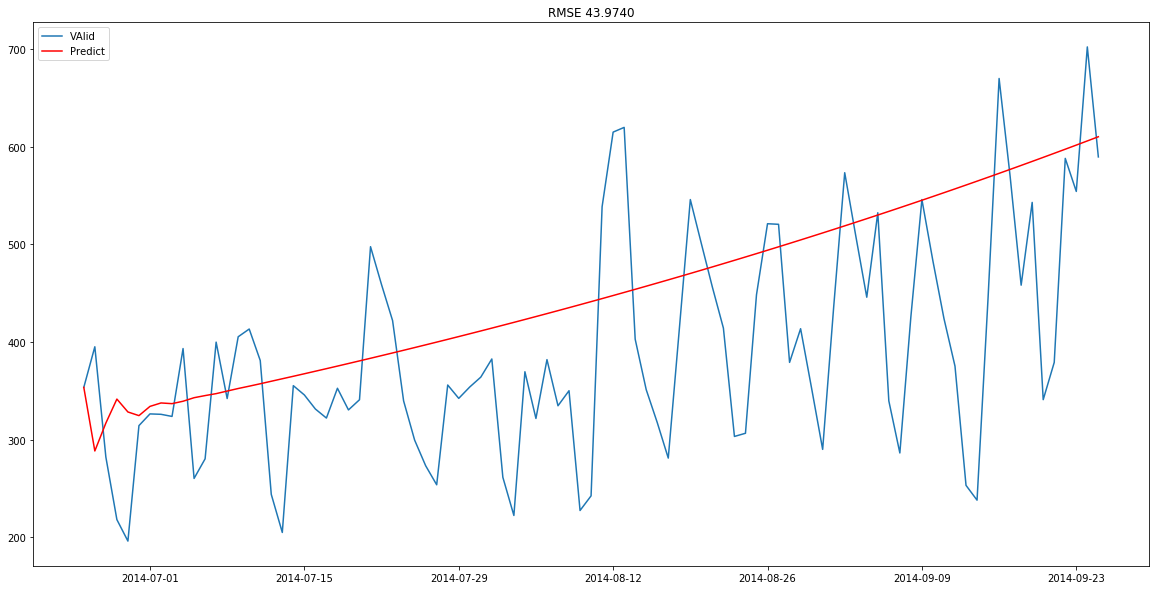

In [252]:
plt.figure(figsize=(20,10))
plt.plot(valid['Count'] , label='VAlid')
plt.plot(AR_predict , color='red' , label='Predict')
plt.legend(loc='best')
plt.title('RMSE %.4f' %(np.sqrt(np.dot(AR_predict , valid['Count'])) / valid.shape[0]))
plt.show()

In [254]:
#MA Model
#moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

In [255]:
model = ARIMA(Train_log , order=(0,1,2))

In [256]:
result_MA = model.fit(disp=-1)

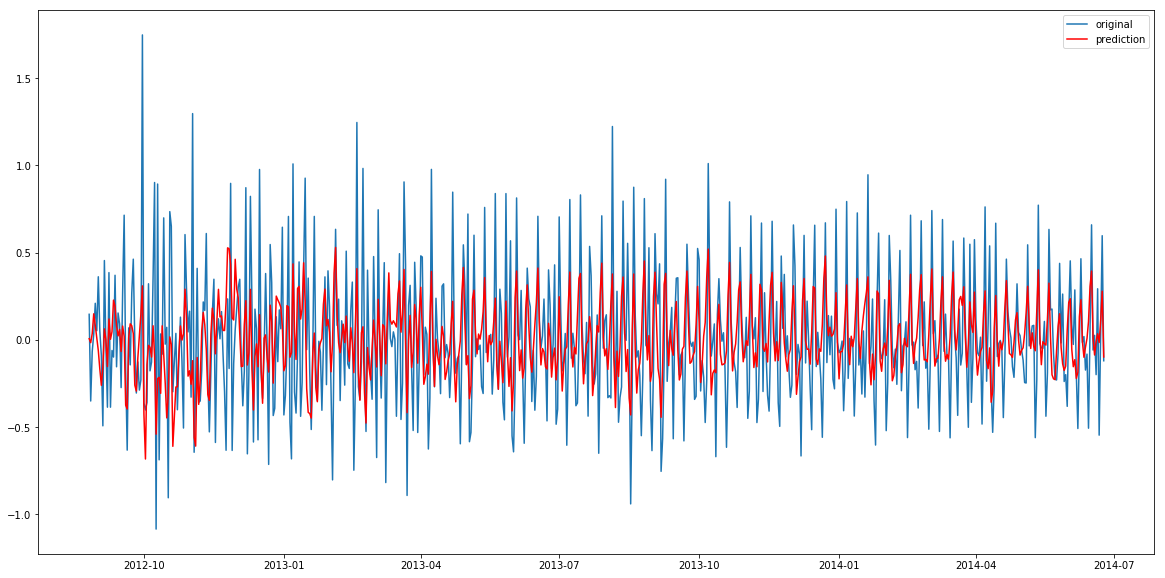

In [257]:
plt.figure(figsize=(20,10))
plt.plot(train_log_dif.dropna() , label='original')
plt.plot(result_MA.fittedvalues , color='red' , label='prediction')
plt.legend(loc='best')
plt.show()

In [264]:
MA_predict = result_MA.predict(start='2014-06-25', end='2014-09-25')

In [265]:
MA_predict = MA_predict.cumsum().shift().fillna(0)

In [266]:
MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0] , index = valid.index)

In [267]:
MA_predict1 = MA_predict1.add(MA_predict , fill_value=0)

In [268]:
MA_predict = np.exp(MA_predict1)

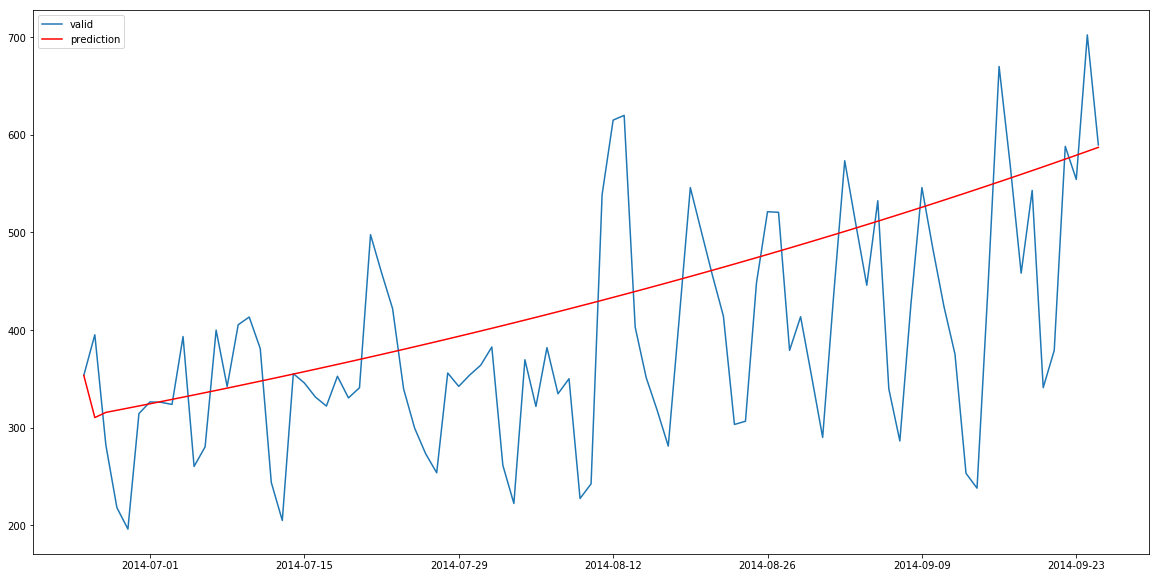

In [269]:
plt.figure(figsize=(20,10))
plt.plot(valid['Count'] , label='valid')
plt.plot(MA_predict , color='red' , label='prediction')
plt.legend(loc='best')
plt.show()

In [272]:
rms = np.sqrt(np.dot(MA_predict , valid['Count'])) / valid.shape[0]

In [273]:
print(rms)

43.26967067134726


In [274]:
#combined model

In [275]:
model = ARIMA(Train_log , order=(2,1,2))

In [276]:
result_CM = model.fit(disp=-1)

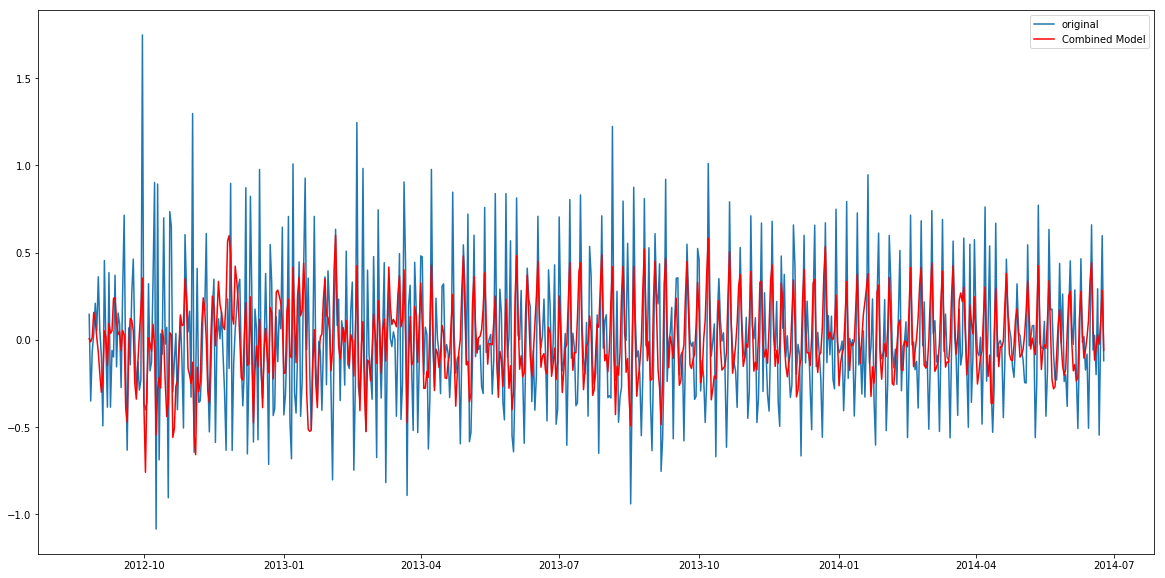

In [277]:
plt.figure(figsize=(20,10))
plt.plot(train_log_dif.dropna() , label='original')
plt.plot(result_CM.fittedvalues , color='red' , label='Combined Model')
plt.legend(loc='best')
plt.show()

In [286]:
ARIma_predicts = result_CM.predict(start='2014-06-25' , end='2014-09-25')

In [287]:
ARIma_predicts = ARIma_predicts.cumsum().shift().fillna(0)

In [288]:
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0] , index = valid.index)

In [289]:
AR_predict1 = AR_predict1.add(ARIma_predicts , fill_value=0)

In [290]:
ARIma_predicts = np.exp(AR_predict1)

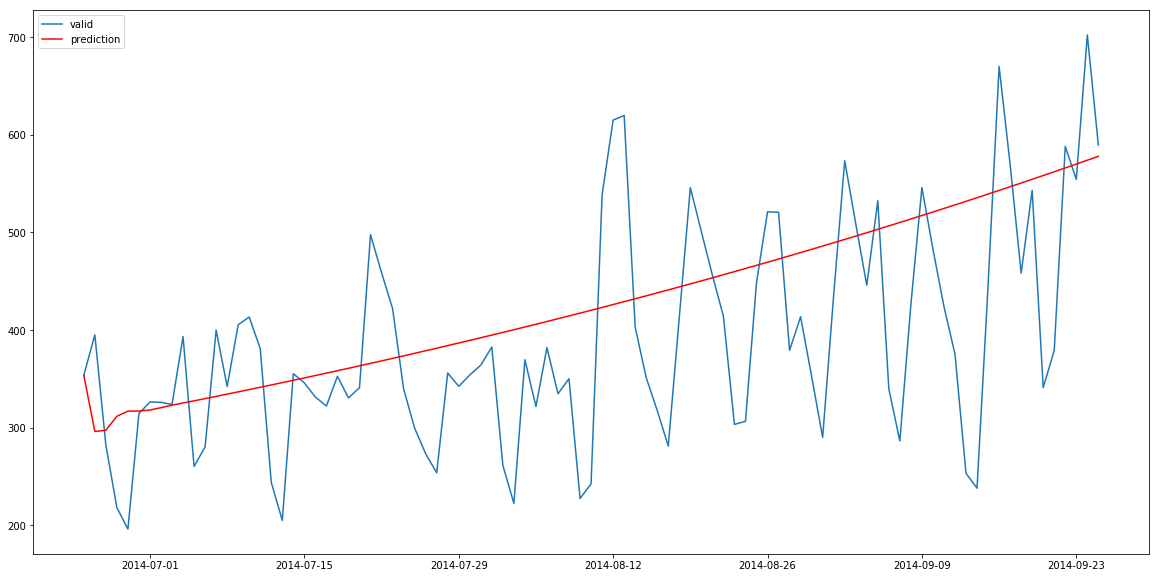

In [291]:
plt.figure(figsize=(20,10))
plt.plot(valid['Count'] , label='valid')
plt.plot(ARIma_predicts , color='red' , label='prediction')
plt.legend(loc='best')
plt.show()

In [292]:
rms = np.sqrt(np.dot(MA_predict , valid['Count'])) / valid.shape[0]

In [293]:
print(rms)

43.26967067134726


In [294]:
#SArmimax Model

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


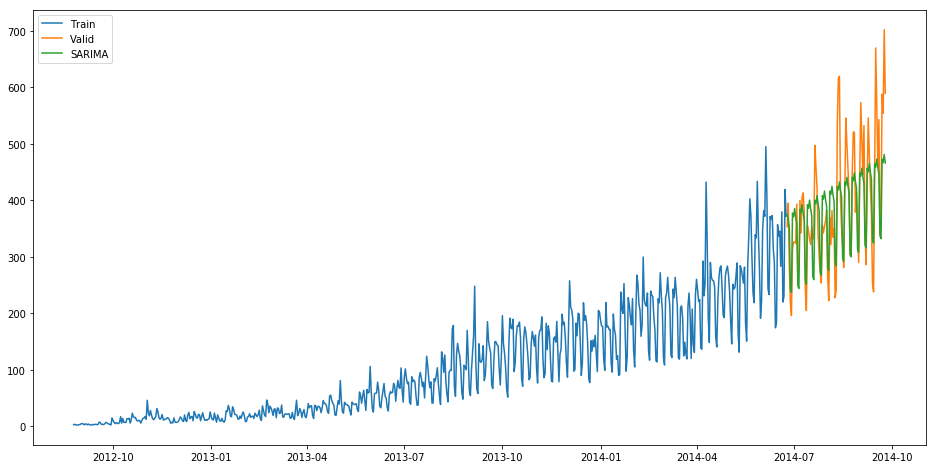

In [296]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [297]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)
69.70093730473587

69.81255356207592


69.70093730473587

In [298]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [299]:
test['prediction']=predict

In [303]:
merge=pd.merge(test, test_ori, on=('day','month', 'year'), how='left') 



In [304]:
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 


In [305]:
prediction=pd.merge(merge, temp2, on='hour', how='left') 

In [309]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')